# Back Propagation

## 1. loading of data

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]                                                   
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [3]:
(X[0][0])

-1.287909498957745

# 2. Computational graph

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

### Task 1: Implementing backpropagation and Gradient checking


<pre>1. <b>Check this video for better understanding of the computational graphs and back propagation:</b> <a href='https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s'>https://www.youtube.com/watch?v=i94OvYb6noo</a>
</pre>

<pre>
2. <b>write two functions</b>

#you can modify the definition of this function according to your needs
<font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, ..., W[8] corresponds to w9 in graph.
        # write code to compute the value of L=(y-y')^2
        </font>
        return (L, any other variables which you might need to use for back propagation)
        <font color='grey'>
        # Hint: you can use dict type to store the required intermediate variables 
        </font>
</font>
</pre>

<pre>
# you can modify the definition of this function according to your needs
<font color='blue'>
def backward_propagation(L, Variables):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # Variables: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        </font>
        return dW
        <font color='grey'>
        # here dW can be a list, or dict or any other data type wich will have gradients of all the weights
        # Hint: you can use dict type to store the required variables 
        </font>
</font>
</pre>
3. <b> <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>Gradient checking</a></b>:<a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> 

<pre>we know that the derivative of any function is </pre>$$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$
<pre>
The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of gradient checking!

</pre>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}

to do this task you need to write a function 
<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):
    <font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    </font>
    approx_gradients = []
    for each wi weight value in W:
        <font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        </font>
        approx_gradients.append(approximation gradients of weight wi)
    <font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    </font>
    return gradient_check
</font>
NOTE: you can do sanity check by checking all the return values of gradient_checking(), they have to be zero. if not you have bug in your code
</pre>

In [4]:
from scipy.stats import norm
mean = 0
std = 0.01

In [5]:
import numpy as np
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [6]:
import math
def forward_propagation(X, y, W):
    v1 = X[0]*W[0] + X[1]*W[1]
    v2 = v1**2
    v3 = v2 + W[5]
    v4 = math.exp(v3)
    v5 = W[6] + v4
    v6 = np.tanh(v5)
    v7 = math.sin(X[2]*W[2])
    v8 = X[3]*W[3] + X[4]*W[4]
    v9 = v7*v8
    v10 = v9 + W[7]
    v11 = sigmoid(v10)
    v12 = v11*W[8]
    y_pred = v12 + v6
    L = (y - y_pred)**2
    return L, [W[2], W[8], v11, v8, v7, v6, v4, v1]

In [7]:
def backward_propagation(L, X, varis):
    dW = []
    d7 = -2*math.sqrt(L)
    d6 = d7*varis[1]*varis[2]*(1-varis[2])
    d5 = d7*(1-varis[5]**2)
    d4 = d5*varis[6]
    d2 = d6
    d3 = d2*varis[4]
    d1 = d4
    dW.append(2*d1*X[0]*varis[7])
    dW.append(2*d1*X[1]*varis[7])
    dW.append(d2*varis[3]*X[2]*math.cos(varis[0]*X[2]))
    dW.append(d3*X[3])
    dW.append(d3*X[4])
    dW.append(d4)
    dW.append(d5)
    dW.append(d6)
    dW.append(d7*varis[2])
    return dW

In [8]:
def gradient_checking(data_point, W, y):
    
    L, varis = forward_propagation(data_point, y, W)
    grads = backward_propagation(L, data_point, varis)
    
    approx_gradients = []
    for w in W:
        plus = []
        for x in W:
            if x is w:
                plus.append(x+0.0001)
            else:
                plus.append(x)
        minus = []
        for x in W:
            if x is w:
                minus.append(x-0.0001)
            else:
                minus.append(x)
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        Lp, varp = forward_propagation(data_point, y, plus)
        Ln, varn = forward_propagation(data_point, y, minus)
        # compute the approximation gradients of weight wi
        
        approx_gradients.append((float(Lp-Ln)/float(2*0.0001)))
    gradient_check = []
    for i in range(len(grads)):
        gradient_check.append((abs(grads[i] - approx_gradients[i])/(abs(grads[i]) + abs(approx_gradients[i]))))
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with      gradient_check formula
    
    return gradient_check


In [9]:
w = []
for i in range(9):
    w.append(mean + np.random.normal()*std)
w

[0.011204946699736911,
 -0.004783991348167765,
 0.0066631474003799,
 -0.006237368339936684,
 -0.007451784010950231,
 -0.0128484134455109,
 -0.011736303251342449,
 -0.007749231670220486,
 -0.008098670569955523]

In [10]:
grad_c = gradient_checking(X[0], w, y[0])
type(y[0])
grad_c

[7.223836488968355e-09,
 4.393427487744211e-10,
 2.907714899341869e-09,
 2.911331169915259e-08,
 2.4883299927159208e-08,
 1.2809328380019019e-09,
 2.626854564013509e-09,
 5.958358703613428e-10,
 1.0186321034070185e-13]

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



In [11]:
from tqdm import tqdm
def vanilla_update(weights, X, y):
    rate = 0.0001
    loss = []
    print(weights)
    for i in tqdm(range(100)):
        for j in range(len(X)):
            L, varis = forward_propagation(X[j], y[j], weights)
            grads = backward_propagation(L, X[j], varis)
            for k in range(len(weights)):
                weights[k] -= rate*grads[k]
        l, varis = forward_propagation(X[j], y[j], weights)
        if len(loss) > 0:
            if l > loss[i-1]:
                break
        loss.append(l)
    print(weights)
    return loss

In [12]:
w = []
for i in range(9):
    w.append(mean + np.random.normal()*std)
w

[-0.0011528842063713491,
 -0.011563315487974938,
 0.0045325773799878115,
 -0.014906171141429524,
 -0.002274253611031472,
 0.0006086921513567536,
 0.018528852338129627,
 0.0019668408494119783,
 -0.0009248698038541521]

In [13]:
losses = vanilla_update(w, X, y)

[-0.0011528842063713491, -0.011563315487974938, 0.0045325773799878115, -0.014906171141429524, -0.002274253611031472, 0.0006086921513567536, 0.018528852338129627, 0.0019668408494119783, -0.0009248698038541521]


 40%|████████████████████████████████                                                | 40/100 [00:00<00:00, 128.44it/s]


[-0.023458981801500512, -0.037043129284976495, 0.0014466746490001032, -0.014330648047863308, -0.0018830994890663662, 0.4611962069884636, 0.3870777812622287, 0.2946249263272607, 1.1254647145405627]


In [14]:
losses[-1]

2.805378720173197e-06

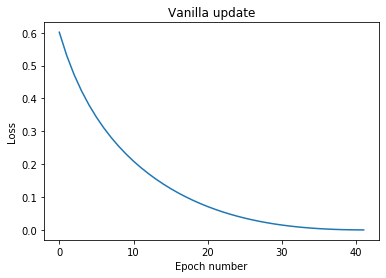

In [15]:
plt.plot(losses)
plt.title('Vanilla update')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()

In [16]:
w = []
for i in range(9):
    w.append(mean + np.random.normal()*std)
w

[0.006497148334835318,
 0.011009416086012875,
 0.006632704071507144,
 -0.0015074249141101327,
 0.021733010509207357,
 0.012665111403862412,
 -0.0005309336204875554,
 -0.009300133981404864,
 0.005881373457546636]

In [17]:
def momentum_update(weights, X, y):
    v = list(np.zeros(len(weights)))
    loss = []
    alpha = 0.00001
    gam = 0.95
    for i in tqdm(range(100)):
        for j in range(len(X)):
            L, varis = forward_propagation(X[j], y[j], weights)
            grads = backward_propagation(L, X[j], varis)
            for k in range(len(weights)):
                v[k] = gam*v[k] + alpha*grads[k]
                weights[k] -= v[k]
        l, varis = forward_propagation(X[j], y[j], weights)
        if len(loss) > 0:
            if l > loss[i-1]:
                break
        loss.append(l)
    print(weights)
    return loss

In [18]:
losses = momentum_update(w, X, y)

 11%|████████▊                                                                       | 11/100 [00:00<00:00, 109.15it/s]


[0.03982059896405682, 0.04516398462119371, 0.009362736906573334, 0.00010560777885563208, 0.022763712983117704, 0.48165763774864845, 0.3690947429058701, 0.29077980427126443, 1.139579833957054]


In [19]:
losses[-1]

6.482204698441409e-06

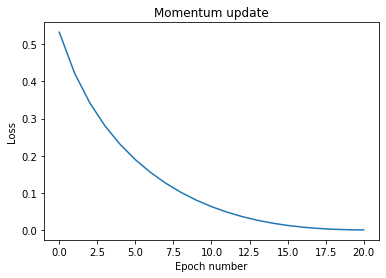

In [20]:
plt.plot(losses)
plt.title('Momentum update')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()

In [21]:
def adam_update(weights, X, y):
    alpha = 0.0001
    beta1 = 0.9
    beta2 = 0.99
    t = 0
    loss = []
    eps = 0.0000001
    m = list(np.zeros(len(weights)))
    v = list(np.zeros(len(weights)))
    mt = list(np.zeros(len(weights)))
    vt = list(np.zeros(len(weights)))
    for i in tqdm(range(100)):
        for j in range(len(X)):
            L, varis = forward_propagation(X[j], y[j], weights)
            grads = backward_propagation(L, X[j], varis)
            t += 1
            for k in range(len(weights)):
                m[k] = beta1*m[k] + (1-beta1)*grads[k]
                mt[k] = m[k] / (1-beta1**t)
                v[k] = beta2*v[k] + (1-beta2)*(grads[k]**2)
                vt[k] = v[k] / (1-beta2**t)
                weights[k] += - alpha * mt[k] / (np.sqrt(vt[k]) + eps)
        l, varis = forward_propagation(X[j], y[j], weights)
        if len(loss) > 0:
            if l > loss[i-1]:
                break
        loss.append(l)
    print(weights)
    return loss

In [22]:
w = []
for i in range(9):
    w.append(mean + np.random.normal()*std)
w

[0.0015216580536809802,
 -0.014357257343994671,
 -0.0162907390324698,
 -0.000411140432707132,
 0.0019514456264395255,
 -0.0277830843598259,
 0.003636072273636491,
 -0.004537702286622462,
 0.008691293878276229]

In [23]:
losses = adam_update(w, X, y)

 19%|███████████████▍                                                                 | 19/100 [00:00<00:01, 40.90it/s]


[-0.5813583084955939, -0.5390694408973956, -0.5594220679046624, -0.6150443118853733, -0.3631071209216714, 0.6909550749013904, 0.6903828954726666, 0.9741426889535462, 0.9521413892524925]


In [24]:
losses[-1]

8.792507432709785e-07

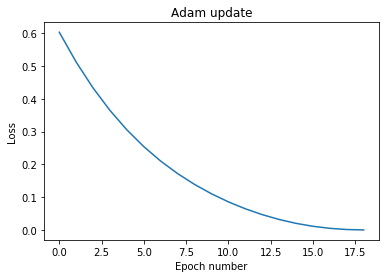

In [25]:
plt.plot(losses)
plt.title('Adam update')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()

## Observations

### a) Vanilla update
<pre>
1. The number of epochs taken to reach convergence is 40. 
2. The value of the minimum loss is 2.805378720173197e-06
3. The value of the learning rate that gave the best result is 0.0001.

### b) Momentum update
<pre>
1. The number of epochs taken to reach the condition of convergence is 11.
2. The value of the minimum loss is 6.482204698441409e-06.
3. The values of the learning rate, and exponential weighing coeffient that gave the best values are 0.00001 and 0.95 respectively.

### c) Adam update
<pre>
1. The number of epochs taken to reach convergence is 19.
2. The value of minimum loss is 8.792507432709785e-07.
3. The values of the learning rate, exponential weight for linear sum, and eexponential weight for squared sum are 0.0001, 0.9, and 0.99 respectively.

## Conclusions
<pre>
1. The most epochs are taken by Vanilla update and the least epochs are required by the momentum update
2. The least loss is achieved by the Adam update with Vanilla not far behind. Out of the three, the maximum loss is given by the momentum update.